# Variable Notes
**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower



**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import pandas as pd

train_data = pd.read_csv('./data//train.csv')

In [2]:
train_data.head()

,fPassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.isna().sum()

fPassengerId      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

## Sibsp

In [4]:
type(train_data['SibSp']), train_data.columns,
sibsb_un = train_data['SibSp'].unique()
sibsb_un.sort()
print(sibsb_un)

[0 1 2 3 4 5 8]


## Parch

In [5]:
parch_un = train_data['Parch'].unique()
parch_un.sort()
print(parch_un)

[0 1 2 3 4 5 6]


In [6]:
import numpy as np
a = np.array([[1,4], [3,1]])
a.sort(axis=0)
a

array([[1, 1],
       [3, 4]])

In [7]:
df_raw = train_data.drop(columns=['fPassengerId'])
df_raw

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df_raw.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_raw.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

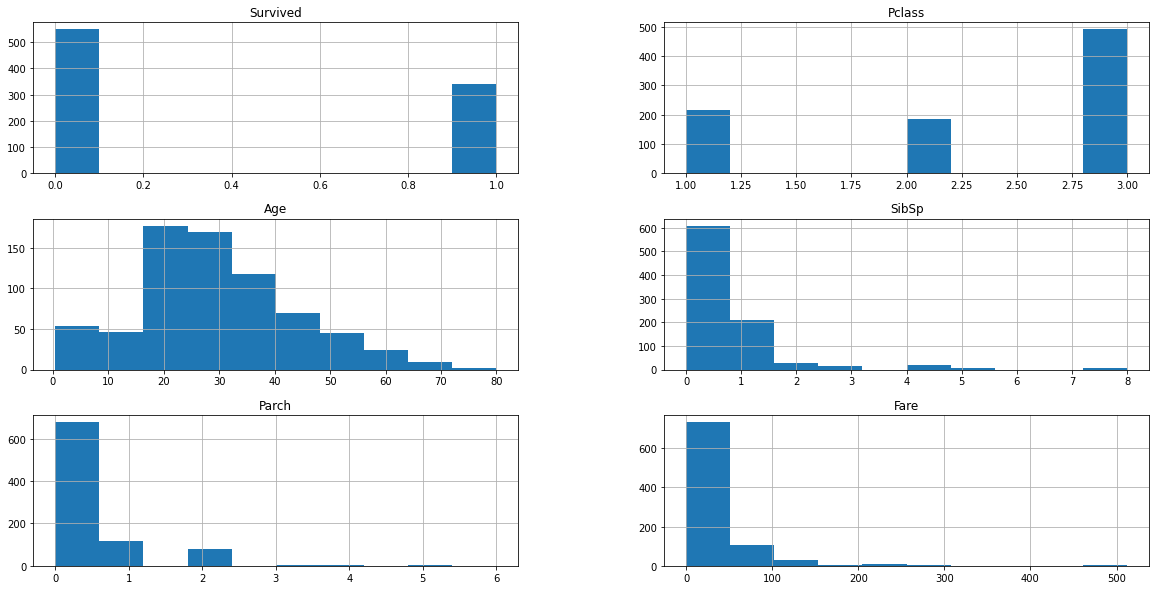

In [10]:
import matplotlib.pyplot as plt

hist = df_raw.hist(figsize=(20, 10))

In [11]:
df_raw.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

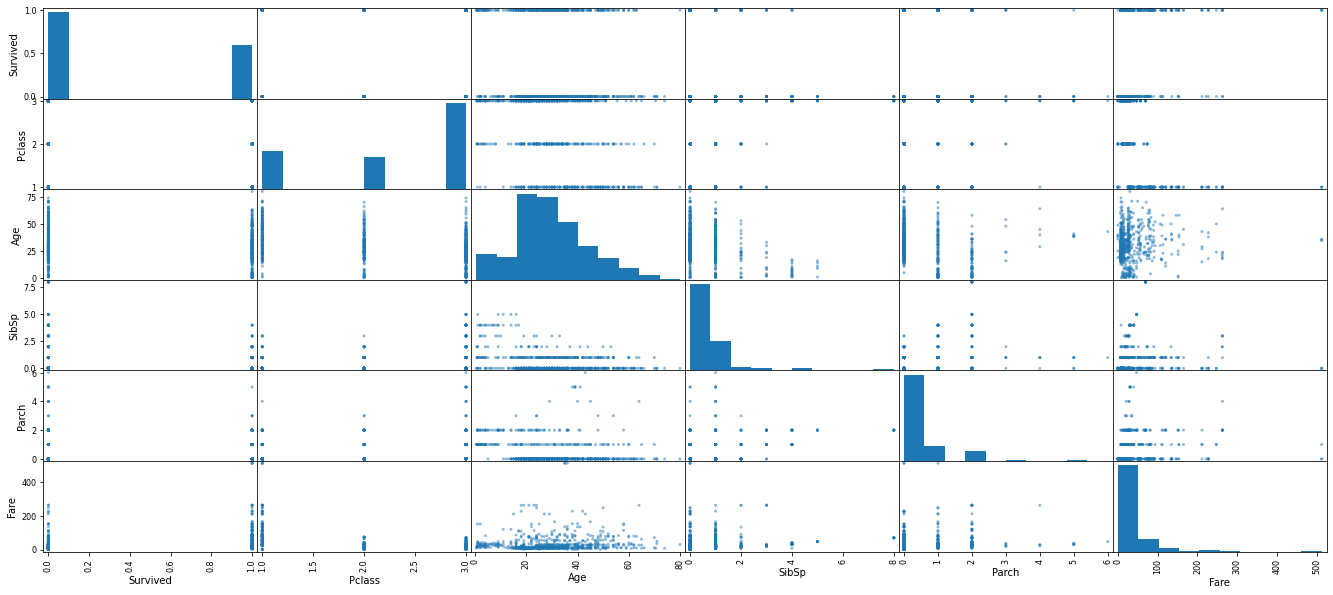

In [12]:
import pandas as pd

pd.plotting.scatter_matrix(df_raw, figsize=(23, 10))

In [13]:
# divide the features
# leave no use features 
no_use_features = ['Name', 'Ticket', 'Cabin']

target = ['Survived']
cat_features = ['Sex', 'Embarked']
cat_num_features = ['Pclass', 'SibSp', 'Parch']
num_features = ['Fare']
num_features_fill = ['Age']

used_features = cat_features + cat_num_features + num_features + num_features_fill
used_features

['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

In [14]:
df = df_raw[target + used_features]
df = df[df['Embarked'].notna()]
print(df.count())
print('Where age is NAN change to mean age')
print(df.columns)
df

Survived    889
Sex         889
Embarked    889
Pclass      889
SibSp       889
Parch       889
Fare        889
Age         712
dtype: int64
Where age is NAN change to mean age
Index(['Survived', 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Age'],
      dtype='object')


,Survived,Sex,Embarked,Pclass,SibSp,Parch,Fare,Age
0,0,male,S,3,1,0,7.2500,22.0
1,1,female,C,1,1,0,71.2833,38.0
2,1,female,S,3,0,0,7.9250,26.0
3,1,female,S,1,1,0,53.1000,35.0
4,0,male,S,3,0,0,8.0500,35.0
...,...,...,...,...,...,...,...,...
886,0,male,S,2,0,0,13.0000,27.0
887,1,female,S,1,0,0,30.0000,19.0
888,0,female,S,3,1,2,23.4500,NaN
889,1,male,C,1,0,0,30.0000,26.0


In [15]:
# заменим возраст на среднее значение
print(df['Age'].mean())
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df.count())

29.64209269662921
Survived    889
Sex         889
Embarked    889
Pclass      889
SibSp       889
Parch       889
Fare        889
Age         889
dtype: int64


In [16]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,29.642093
std,0.486260,0.834700,1.103705,0.806761,49.697504,12.968346
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,22.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.642093
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000


In [17]:
df

,Survived,Sex,Embarked,Pclass,SibSp,Parch,Fare,Age
0,0,male,S,3,1,0,7.2500,22.000000
1,1,female,C,1,1,0,71.2833,38.000000
2,1,female,S,3,0,0,7.9250,26.000000
3,1,female,S,1,1,0,53.1000,35.000000
4,0,male,S,3,0,0,8.0500,35.000000
...,...,...,...,...,...,...,...,...
886,0,male,S,2,0,0,13.0000,27.000000
887,1,female,S,1,0,0,30.0000,19.000000
888,0,female,S,3,1,2,23.4500,29.642093
889,1,male,C,1,0,0,30.0000,26.000000


In [18]:
X = df[used_features]
y = df[['Survived']].to_numpy().reshape(-1, )
X.shape, y.shape

((889, 7), (889,))

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np


num_pipeline = Pipeline([('scaller', StandardScaler())])
num_pipeline_mean = Pipeline([('fill NA num', SimpleImputer(missing_values=np.nan, strategy='mean')), ('scaller', StandardScaler())])
num_pipeline_median = Pipeline([('fill NA num', SimpleImputer(missing_values=np.nan, strategy='median')), ('scaller', StandardScaler())])

transform_pipeline_mean = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', num_pipeline, num_features),
    ('num mean', num_pipeline_mean, num_features_fill)
], 
remainder='passthrough')

transform_pipeline_median = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', num_pipeline, num_features),
    ('num median', num_pipeline_median, num_features_fill)
], 
remainder='passthrough')

In [20]:
from sklearn.model_selection import train_test_split

X_prepared_age_mean = transform_pipeline_mean.fit_transform(X)
X_prepared_age_median = transform_pipeline_median.fit_transform(X)

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_score_age_mean = cross_val_score(sgd_clf, X_prepared_age_mean, y)
sgd_score_age_median = cross_val_score(sgd_clf, X_prepared_age_median, y)

sgd_score_age_mean.mean(), sgd_score_age_median.mean()

(0.691500031739986, 0.691500031739986)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf_clf, X_prepared_age_mean, y).mean()

0.8144289976512409

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_score_age_mean = cross_val_score(rf_clf, X_prepared_age_mean, y)
rf_score_age_median = cross_val_score(rf_clf, X_prepared_age_median, y)

rf_score_age_mean.mean(), rf_score_age_median.mean()

(0.811058211134387, 0.8121754586427983)

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators' : [100, 200, 300, 500, 700, 1000],
    'criterion': ['gini', 'entropy']
}

rf_grid_clf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions=params, random_state=42, n_iter=20, cv=5)
# rf_grid_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=params, cv=5)
rf_grid_clf.fit(X_prepared_age_median, y)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 1000]},
                   random_state=42)

In [89]:
rf_grid_clf.cv_results_

{'mean_fit_time': array([0.72325091, 0.45039682, 0.20855999, 0.1560637 , 0.09768705,
        0.15361023, 0.0925252 , 0.15603604, 0.42510176, 0.15242805,
        0.19597864, 0.35684466, 0.10352697, 0.37307606, 0.36544833,
        0.15345449, 0.60549488, 0.37560029, 0.37617679, 0.36881738]),
 'std_fit_time': array([0.46139658, 0.02074507, 0.03499071, 0.01267857, 0.01269313,
        0.00996013, 0.00168471, 0.01394763, 0.01083395, 0.00997656,
        0.00187774, 0.01272074, 0.01298988, 0.01142974, 0.01655882,
        0.00848128, 0.06230239, 0.01362414, 0.01282635, 0.01391147]),
 'mean_score_time': array([0.08267441, 0.08660851, 0.04107256, 0.02793679, 0.01711774,
        0.03066788, 0.01669021, 0.02786794, 0.08653116, 0.02896624,
        0.04056454, 0.06605144, 0.01793361, 0.06310911, 0.0626267 ,
        0.03023248, 0.12627912, 0.06292458, 0.06550097, 0.06030264]),
 'std_score_time': array([0.03266556, 0.00276221, 0.00449793, 0.00116508, 0.00058933,
        0.00398616, 0.0001194 , 0.000944

In [78]:
rf_grid_clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
cross_val_score(rf_grid_clf.best_estimator_, X_prepared_age_median, y, cv=5)

array([0.80337079, 0.80898876, 0.84831461, 0.80337079, 0.85875706])

In [81]:
tit_test = pd.read_csv('./data/test.csv')

In [82]:
tit_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
tit_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
tit_test[tit_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [85]:
tit_test.loc[152, ['Fare']] = 7.8

In [86]:
tit_test[tit_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [87]:
test_data = tit_test[used_features]

In [88]:
X_test_prepared = transform_pipeline_median.fit_transform(test_data)
test_predict = rf_grid_clf.best_estimator_.predict(X_test_prepared)
df_ans = pd.DataFrame({'PassengerId': tit_test['PassengerId'], 'Survived': test_predict})
df_ans.to_csv('2022-04-17_21-56_gender_submission.csv', index=0)